# Exploring False Color Imagery 
## A case study about the Eaton and Palisades Fires

Author: Leela Dixit

GitHub Repository: https://github.com/lsdixit/eds220-hwk4

# Step 1: Background
The Eaton and Palisades fire in Los Angeles County were devestating for local communities, damaging thousands of homes and many acres of ecological habitat, leaving deep scars in both the communities they affected and the land itself. In this study, we will visualize the extents of the Eaton and Palisades fires using false color imagery through landsat data and known perimeters of both fires.


To learn more about false color images and landsats, see the following resources:

[Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

[What are the band designations for the Landsat satellites? ](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

## Analysis Highlights

In this study, we will highlight the following skills:

1. Examining rioxarrays and NetCDF files to pull, transform, and manipulate spatial data.
2. Map true color images from NetCDF files.
3. Map false color images from NetCDF files.
4. Plot multiple shapefiles using Matplotlib to support environmental monitoring.

## About the data

Landsat data are from [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2). These data contain bands for red, green, blue, near-infrared and shortwave infrared, from the Landsat Collection 2 Level-2 collected by Landsat-8. Our data is cropped to areas surrounding the extent of the fires.

Perimeter data are from [Los Angeles County Dissolved Fire Perimeter Data](https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about). These data originate from data containing daily snapshots of perimeters, but are dissolved into one layer for these data.

Fire perimeter data: https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about
Landsat data: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

## References

Microsoft Planetary Computer. (2024). Microsoft.com. *Landsat Collection 2 Level-2*.  https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. Landsat 8-9 OLI/TIRS Collection 2 Level-2 : (10.5066/P9OGBGM6). 11/20/2025.

County of Los Angeles. *Palisades and Eaton Dissolved Fire Perimeters*. (2025). https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about. 11/20/2025.



Load all libraries

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

Read in data

In [2]:
# Read in NetCDF file
landsat = xr.open_dataset('landsat8-2025-02-23-palisades-eaton.nc')

# Read in perimeter data
eaton_perimeter = gpd.read_file('Eaton_Perimeter/Eaton_Perimeter_20250121.shp')
palisades_perimeter = gpd.read_file('Palisades_Perimeter/Palisades_Perimeter_20250121.shp')

# Step 2: Fire perimeter data exploration

Explore the fire perimeter data and write a brief summary of the information you obtained from the preliminary exploration.

In [3]:
# Explore the Eaton fire data

# Check crs
print(eaton_perimeter.crs)
# Check columns and types
print(eaton_perimeter.dtypes)
# Look at first few rows
print(eaton_perimeter.head(2))
# Check row and column numbers
print(eaton_perimeter.shape)

EPSG:3857
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
   OBJECTID            type    Shape__Are  Shape__Len  \
0         1  Heat Perimeter   2206.265625  270.199719   
1         2  Heat Perimeter  20710.207031  839.204218   

                                            geometry  
0  POLYGON ((-13146936.686 4051222.067, -13146932...  
1  POLYGON ((-13150835.463 4052713.929, -13150831...  
(20, 5)


In [4]:
# Explore the Palisades fire data

# Check crs
print(palisades_perimeter.crs)
# Check columns and types
print(palisades_perimeter.dtypes)
# Look at first few rows
print(palisades_perimeter.head(2))
# Check row and column numbers
print(palisades_perimeter.shape)

EPSG:3857
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
   OBJECTID            type   Shape__Are  Shape__Len  \
0         1  Heat Perimeter  1182.082031  267.101144   
1         2  Heat Perimeter  2222.488281  185.498783   

                                            geometry  
0  POLYGON ((-13193543.302 4032913.077, -13193543...  
1  POLYGON ((-13193524.155 4033067.953, -13193524...  
(21, 5)


The data frames for both fires have the same 5 columns including geometry, with the same data types. All data types look appropriate for the values in the respective columns. Palisades's fire has one extra row. Both data frames are in EPSG:3857, which is a projected crs often used in programs like OpenStreetMap, Google Maps, ArcGIS and ESRI.

# Step 3: NetCDF data import and exploration

Explore the data and write a brief summary of the information you obtained from the preliminary information.

In [5]:
# Examine data
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

The landsat data have 5 variables corresponding to different spectral bands and 1 variable that is a spatial band reference. The data have 2 dimensions of differing sizes corresponding to the latitude and longitude and a dimension of time. There are no attributes listed.

# Step 4: Restoring geospatial information
Check the coordinate reference system of the landsat data and transform as necessary.

In [6]:
# Check the CRS 
print(landsat.rio.crs)

None


In [7]:
# Check CRS on each coordinate
print(landsat.x.rio.crs)
print(landsat.y.rio.crs)

EPSG:32611
EPSG:32611


The landsat data return no CRS when applying `rio.crs` to it. We know this is a spatial data set as 2 of it's dimensions are latitude and longitude. When we run `rio.crs` on each latitude and longitude variable, it will return "EPSG:32611"

In [8]:
# Pull out the CRS information by accessing that attribute
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [9]:
# Assign the correct crs to the data
landsat.rio.write_crs(32611, inplace = True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [10]:
# Check crs is correctly applied
print(landsat.rio.crs)

EPSG:32611


# Step 5:  True color image
Visualize the area of interest (AOI) with true color imagery.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


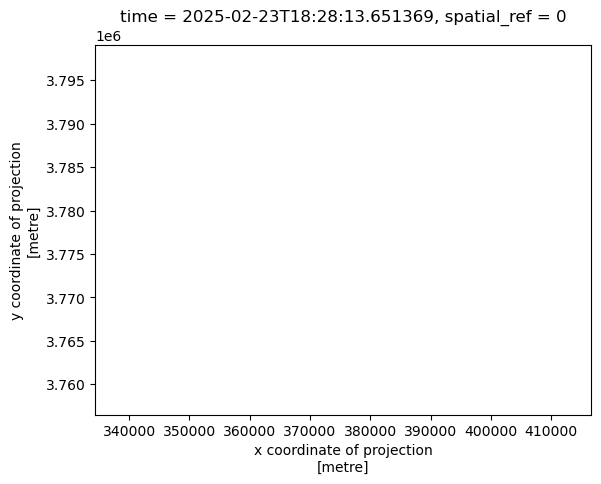

In [11]:
# Select red, green, and blue variables and plot 
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


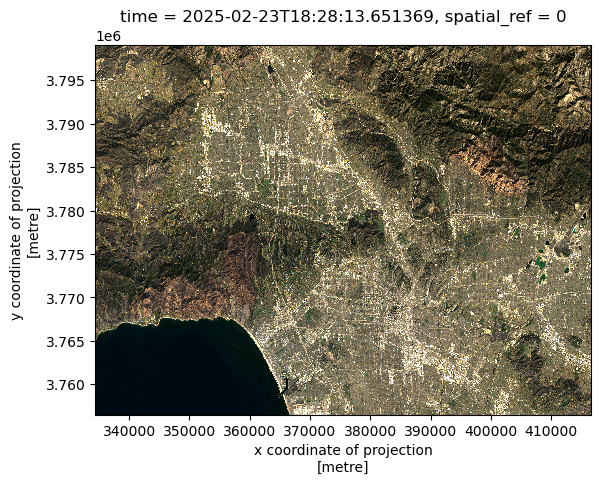

In [12]:
# Plot red, green, and blue variables with robust=True
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In [13]:
# Identify which bands have NAs and how many
np.isnan(landsat[['red', 'green', 'blue']]).sum()

<xarray.Dataset> Size: 40B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          int64 8B 0
    green        int64 8B 1
    blue         int64 8B 109

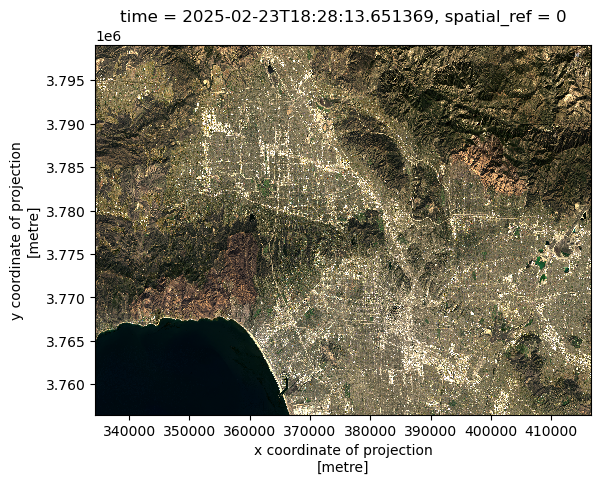

In [14]:
# Select red, green, and blue variables, remove NAs and adjust the scale
landsat[['red', 'green', 'blue']].fillna(0).to_array().plot.imshow(robust = True)

In our original plot, we get nothing to populate. By adding robust = True, we told our plot to ignore outliers when mapping. By removing NA values, we fix discrepencies caused by any cloud cover or reflectance to get a better true image color.

# Step 6: False Color Image
Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

Text(0, 0.5, '')

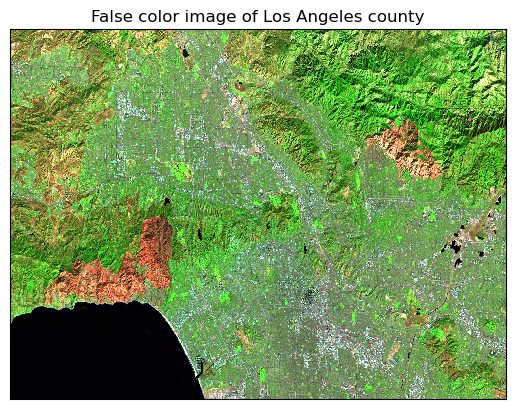

In [15]:
# Plot a false color image with short-wave infrared, near-infrared, and red
fig, ax = plt.subplots()

landsat[['swir22', 'nir08', 'red']].fillna(0).to_array().plot.imshow(robust = True)

# Set title
ax.set_title("False color image of Los Angeles county")

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("") 

# Step 7: Map false color image with fire perimeters
Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. 

In [16]:
# Check CRS and update
print(palisades_perimeter.crs)
print(eaton_perimeter.crs)

# Update CRS to match the landsat data
palisades_perimeter = palisades_perimeter.to_crs('epsg:32611')
eaton_perimeter = eaton_perimeter.to_crs('epsg:32611')

# Check that the update worked
print(palisades_perimeter.crs)
print(eaton_perimeter.crs)

EPSG:3857
EPSG:3857
epsg:32611
epsg:32611


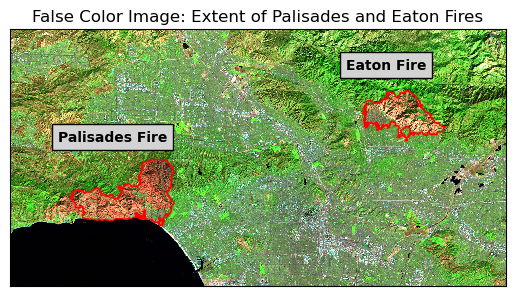

In [17]:
fig, ax = plt.subplots()

# Plot the false color landsat map
landsat[['swir22', 'nir08', 'red']].fillna(0).to_array().plot.imshow(robust = True)

# Plot perimeters overlayed on the false color map
palisades_perimeter.plot(ax=ax, color = 'none', edgecolor='red')
eaton_perimeter.plot(ax=ax, color = 'none', edgecolor='red')

# Set title
ax.set_title("False Color Image: Extent of Palisades and Eaton Fires")

# Add labels for each fire
plt.figtext(x = .65,
            y = .68,
            s ="Eaton Fire",
            weight = 'bold',
            bbox=dict(facecolor='lightgray', edgecolor='black'))
plt.figtext(x = .2,
            y = .53,
            s ="Palisades Fire",
            weight = 'bold',
            bbox=dict(facecolor='lightgray', edgecolor='black'))

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("") 

plt.show()

Here we are visualizing landsat data from Los Angeles County, focusing on the areas encompassing the Palisades and Eaton fires from January 2025. This is a false color image, with short-wave infrared assigned to red, near-infrared assigned to blue, and red assigned to green. Short-wave infrared highlights recently burned areas, and near-infrared highlights areas of healthy vegetation. With this method, we are able to easily identify fire scars left behind from the large fires, identified by the red color on the map. Overlayed are known perimeters of each fire, and we can see the perimeters and scars identified by landsat are very similar.